energie de la bande inderdite :  2.4257999999999997 eV
bande interdite direct : True
étiquettes kpoint de la transition, (ex : “\Gamma-X”) : F-F


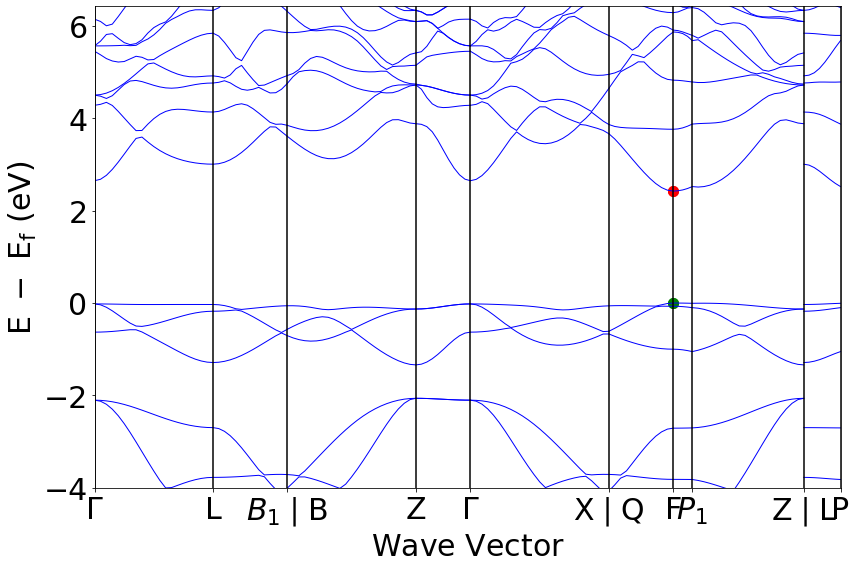

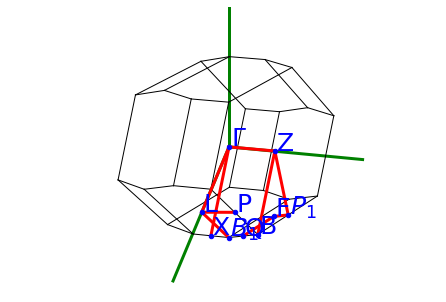

Bande de conduction avec le plus de dispersion :
Liste des indices de la bande de valence maximum : defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})
L'étiquette du kpoint est : F
L'énergie de la bande de valence maximum : 2.8925 eV


Bande de conduction avec le moins de dispersion :
Liste des indices de la bande de valence minimum : defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
L'étiquette du kpoint est : F
L'énergie de la bande de valence minimum : 5.3183 eV


La masse effective de la bande maximal de conduction est :  1.9993419741619018e-69 kg


La masse effective de la bande minimal de conduction est :  1.0873957204864902e-69 kg


In [7]:
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt 
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
from scipy import constants

m = MPRester("JsnJ9pas7aGyFxGDx")
#Structure for material id
structure =m.get_structure_by_material_id("mp-23009")
bandStructure = m.get_bandstructure_by_material_id("mp-23009")

#1) Déterminer la bande interdite

indirectBand = bandStructure.get_band_gap() #Return type A dict {“energy”,”direct”,”transition”} =>API
energ = indirectBand ['energy']
direct = indirectBand ["direct"]
transi = indirectBand ["transition"]

print("energie de la bande inderdite : ", energ, "eV")
print("bande interdite direct :", direct)
print("étiquettes kpoint de la transition, (ex : “\Gamma-X”) :" , transi)

#2)Touver la direction avec le moins et le plus de dispersion + figure avec flèches

#Figure
bsp = BSPlotter (bandStructure)
bsp.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None) 
#On peut voir le vbm (valence band maximum) en rouge et le cbm (minimum of the conduction band) en vert
bsp.plot_brillouin()

#On recherche la bande de valence (conduction) avec le plus de dispertion

vbm = bandStructure.get_vbm() #Returns data about the VBM : {“band_index”,”kpoint_index”,”kpoint”,”energy”} 
index = vbm["band_index"] #A dict with spin keys pointing to a list of the indices of the band containing the VBM
kpointIndex = vbm["kpoint_index"]#The list of indices in self.kpoints for the kpoint vbm
kpointVBM = vbm["kpoint"]#The kpoint (as a kpoint object)
energy = vbm ["energy"]#The energy of the VBM

print("Bande de conduction avec le plus de dispersion :")
print("Liste des indices de la bande de valence maximum :", index)
print("L'étiquette du kpoint est :", kpointVBM.label)
print("L'énergie de la bande de valence maximum :", energy, "eV")
print("\n")
#On recherche la bande de valence (conduction) avec le moins de dispertion

cbm = bandStructure.get_cbm() #Returns data about the VBM : {“band_index”,”kpoint_index”,”kpoint”,”energy”} 
index = cbm["band_index"] #A dict with spin keys pointing to a list of the indices of the band containing the VBM
kpointIndex = cbm["kpoint_index"]#The list of indices in self.kpoints for the kpoint vbm
kpointCBM = cbm["kpoint"]#The kpoint (as a kpoint object)
energy = cbm ["energy"]#The energy of the VBM

print("Bande de conduction avec le moins de dispersion :")
print("Liste des indices de la bande de valence minimum :", index)
print("L'étiquette du kpoint est :", kpointVBM.label)
print("L'énergie de la bande de valence minimum :", energy, "eV")

#3) Calculer la masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique 
#Comme nous avons vu en cours :
# masse effective = (h barré)² * k^2/(2*m_eff)
print("\n")

#masse effective pour la bande maximal de conduction
k = np.linalg.norm(kpointVBM.cart_coords)
E_k = vbm["energy"]
masseEffe =  ((constants.hbar)**2*k**2) /(2*E_k) 
print("La masse effective de la bande maximal de conduction est : ", masseEffe ,"kg" )

#masse effective pour la bande minimal de conduction
print("\n")
k = np.linalg.norm(kpointCBM.cart_coords)
E_k = cbm["energy"]
masseEffe =  ((constants.hbar)**2*k**2) /(2*E_k) 
print("La masse effective de la bande minimal de conduction est : ", masseEffe ,"kg" )
